<a href="https://colab.research.google.com/github/51Sirius/BonusTrackProject/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Скрипт для генерации запросов заполнения таблиц
---

#### Имопрт библиотек

*   random - стандартная библотека рандома
*   datetime - стандартная библиотека для работы с временем
*   faker - внешняя библиотека для создания рандомных данных(имеет локализацию)
*   google - для скачивания итогового файла

In [1]:
!pip install Faker
import random
import datetime
from faker import Faker
from google.colab import files
from faker.providers.address.ru_RU import Provider

#### Код для генерации случайных значений по типу переменной
В функцию на вход подается название типа значения и на выход функция выдает случайное значение.
Типы значений и их описание:


1.   callname - название чего либо ex. название продукта
2.   id_p - id чего либо, но primary, то есть нельзя чтобы они случайно генерировались, поэтому функция выдает ошибку, которая позже отлавливается
3.   first-name - Имя человека
4.   last-name - Фамилия человека
5.   surname - Отчество человека
6.   address - Адресс какого либо объекта
7.   id - id, чаще всего айдишник предназначеный для внешнего ключа
8.   text - Рандомный текст
9.   birthdate - Рандомная дата рождения
10.  price - Цена какого-то объекта
11.  float - Рандомное число с плавующей точкой
12.  time - Время ex. 22 часов время закрытия
13.  bool - True или False
14.  url - Рандомная ссылка ввиде картинки
15.  mail - Рандомная почта
16.  phone - Рандомный номер телефона
17.  createDate - Рандомная дата создания
18.  rating - Случайный рейтинг
19.  type - Тип банковской карты
20.  card - Номер банковской карты
21.  name - Случайное полное имя
22.  properties-type - Случайный тип свойства
23.  gender - Случайный пол
24.  propeties - Случайное свойство
25.  categoryes - Случайная категория
26.  sub-categoryes - Случайная под категория товара


In [2]:
card_types = ['Visa', 'Мир', 'MasterCard']
properties_types = ['Синий', 'Красный', 'Тяжелый', 'Легкий', 'Средний']
properies = ['Вес', 'Цвет', 'Порода']
categoryes = ['Спорт', 'Косметика', 'Животные']
sub_categoryes = ['Туризм', 'Велоспорт', 'Для кошек', 'Для собачек', 'Женская']

In [3]:
fake = Faker('ru_RU')
fake.add_provider(Provider)
count = 50
def get_random_value(value_type):
  match value_type:
    case "int":
      return random.randint(0,100)
    case "callname":
      return fake.text().split()[0]
    case "id_p":
      raise ValueError
    case "first-name":
      return fake.first_name()
    case "last-name":
      return fake.last_name()
    case "surname":
      return fake.first_name() + 'ич'
    case "address":
      return fake.address().replace(",",";")
    case "id":
      return random.randint(0, count-1)
    case "text":
      return fake.text()
    case "birthdate":
      start_date = datetime.date(1974, 1, 1)
      end_date = datetime.date(2023, 12, 31)
      random_date = start_date + datetime.timedelta(days=random.randint(0, (end_date - start_date).days))
      return f"{random_date.strftime('%Y-%m-%d')}"
    case "price":
      return round(fake.pyfloat(right_digits=2, min_value=0, max_value=1000), 2)
    case "float":
      return round(fake.pyfloat(right_digits=2, min_value=100, max_value=10000), 2)
    case "time":
      return f'{random.randint(12, 24)}'
    case "bool":
      return f'{random.randint(0, 1)}'
    case "url":
      return fake.image_url()
    case "mail":
      return fake.email()
    case "phone":
      return fake.phone_number()
    case "createDate":
      start_date = datetime.date(2022, 1, 1)
      end_date = datetime.date(2023, 12, 31)
      random_date = start_date + datetime.timedelta(days=random.randint(0, (end_date - start_date).days))
      return f"{random_date.strftime('%Y-%m-%d')}"
    case "rating":
      return round(fake.pyfloat(right_digits=2, min_value=0, max_value=10), 1)
    case "type":
      return card_types[random.randint(0, len(card_types)-1)]
    case "card":
      return fake.credit_card_number()
    case "name":
      return fake.name()
    case "gender":
      ls = ["М", "Ж"]
      return ls[random.randint(0,1)]
    case "properties-type":
      return properties_types[random.randint(0, len(properties_types)-1)]
    case "propeties":
      return properies[random.randint(0, len(properies)-1)]
    case "categoryes":
      return categoryes[random.randint(0, len(categoryes)-1)]
    case "sub-categoryes":
      return sub_categoryes[random.randint(0, len(sub_categoryes)-1)]

#### Класс таблицы с функцией генерации запросов для неё
Класс экземляром которого будет таблица базы данных.
Есть метод который генерирует список запросов задонного количества, для заполнения таблицы .

In [4]:
class Table:
  def __init__(self, tablename: str, columns: dict, count: int):
    self.tablename = tablename
    self.columns = columns
    self.count = count
    self.column_names = ', '.join(f'"{column}"' for column in list(self.columns.keys()))

  def generate(self) -> list:
    result = []
    for i in range(self.count):
          insert_query = f'INSERT INTO "{self.tablename}" ({self.column_names}) VALUES ({self.__generate_values(i)});\n'
          result.append(insert_query)
    return result

  def __generate_values(self, index) -> str:
    result = []
    for value_type in self.columns.values():
      try:
        value = get_random_value(value_type)
      except ValueError:
        value = index
      result.append(value)
    return ', '.join("'"+str(value)+"'" for value in result)


#### Класс генератор файла с запросами для множества таблиц
Функционал данного класса: генерация sql файла с запросами для заполнения n-го количества таблиц.

In [5]:
class FileGenerator:
  def __init__(self, filename: str, tables: list):
    self.filename=filename
    self.tables = tables

  def create_file(self):
    passfilename = f'{self.filename}.sql'
    with open(self.filename, 'w') as f:
      for query in self.__create_all():
          f.write(query)
          print(query, end='')
      f.close()

  def __create_all(self) -> list:
    result = []
    for table in self.tables:
      result += table.generate()
    return result

#### Заполнение таблиц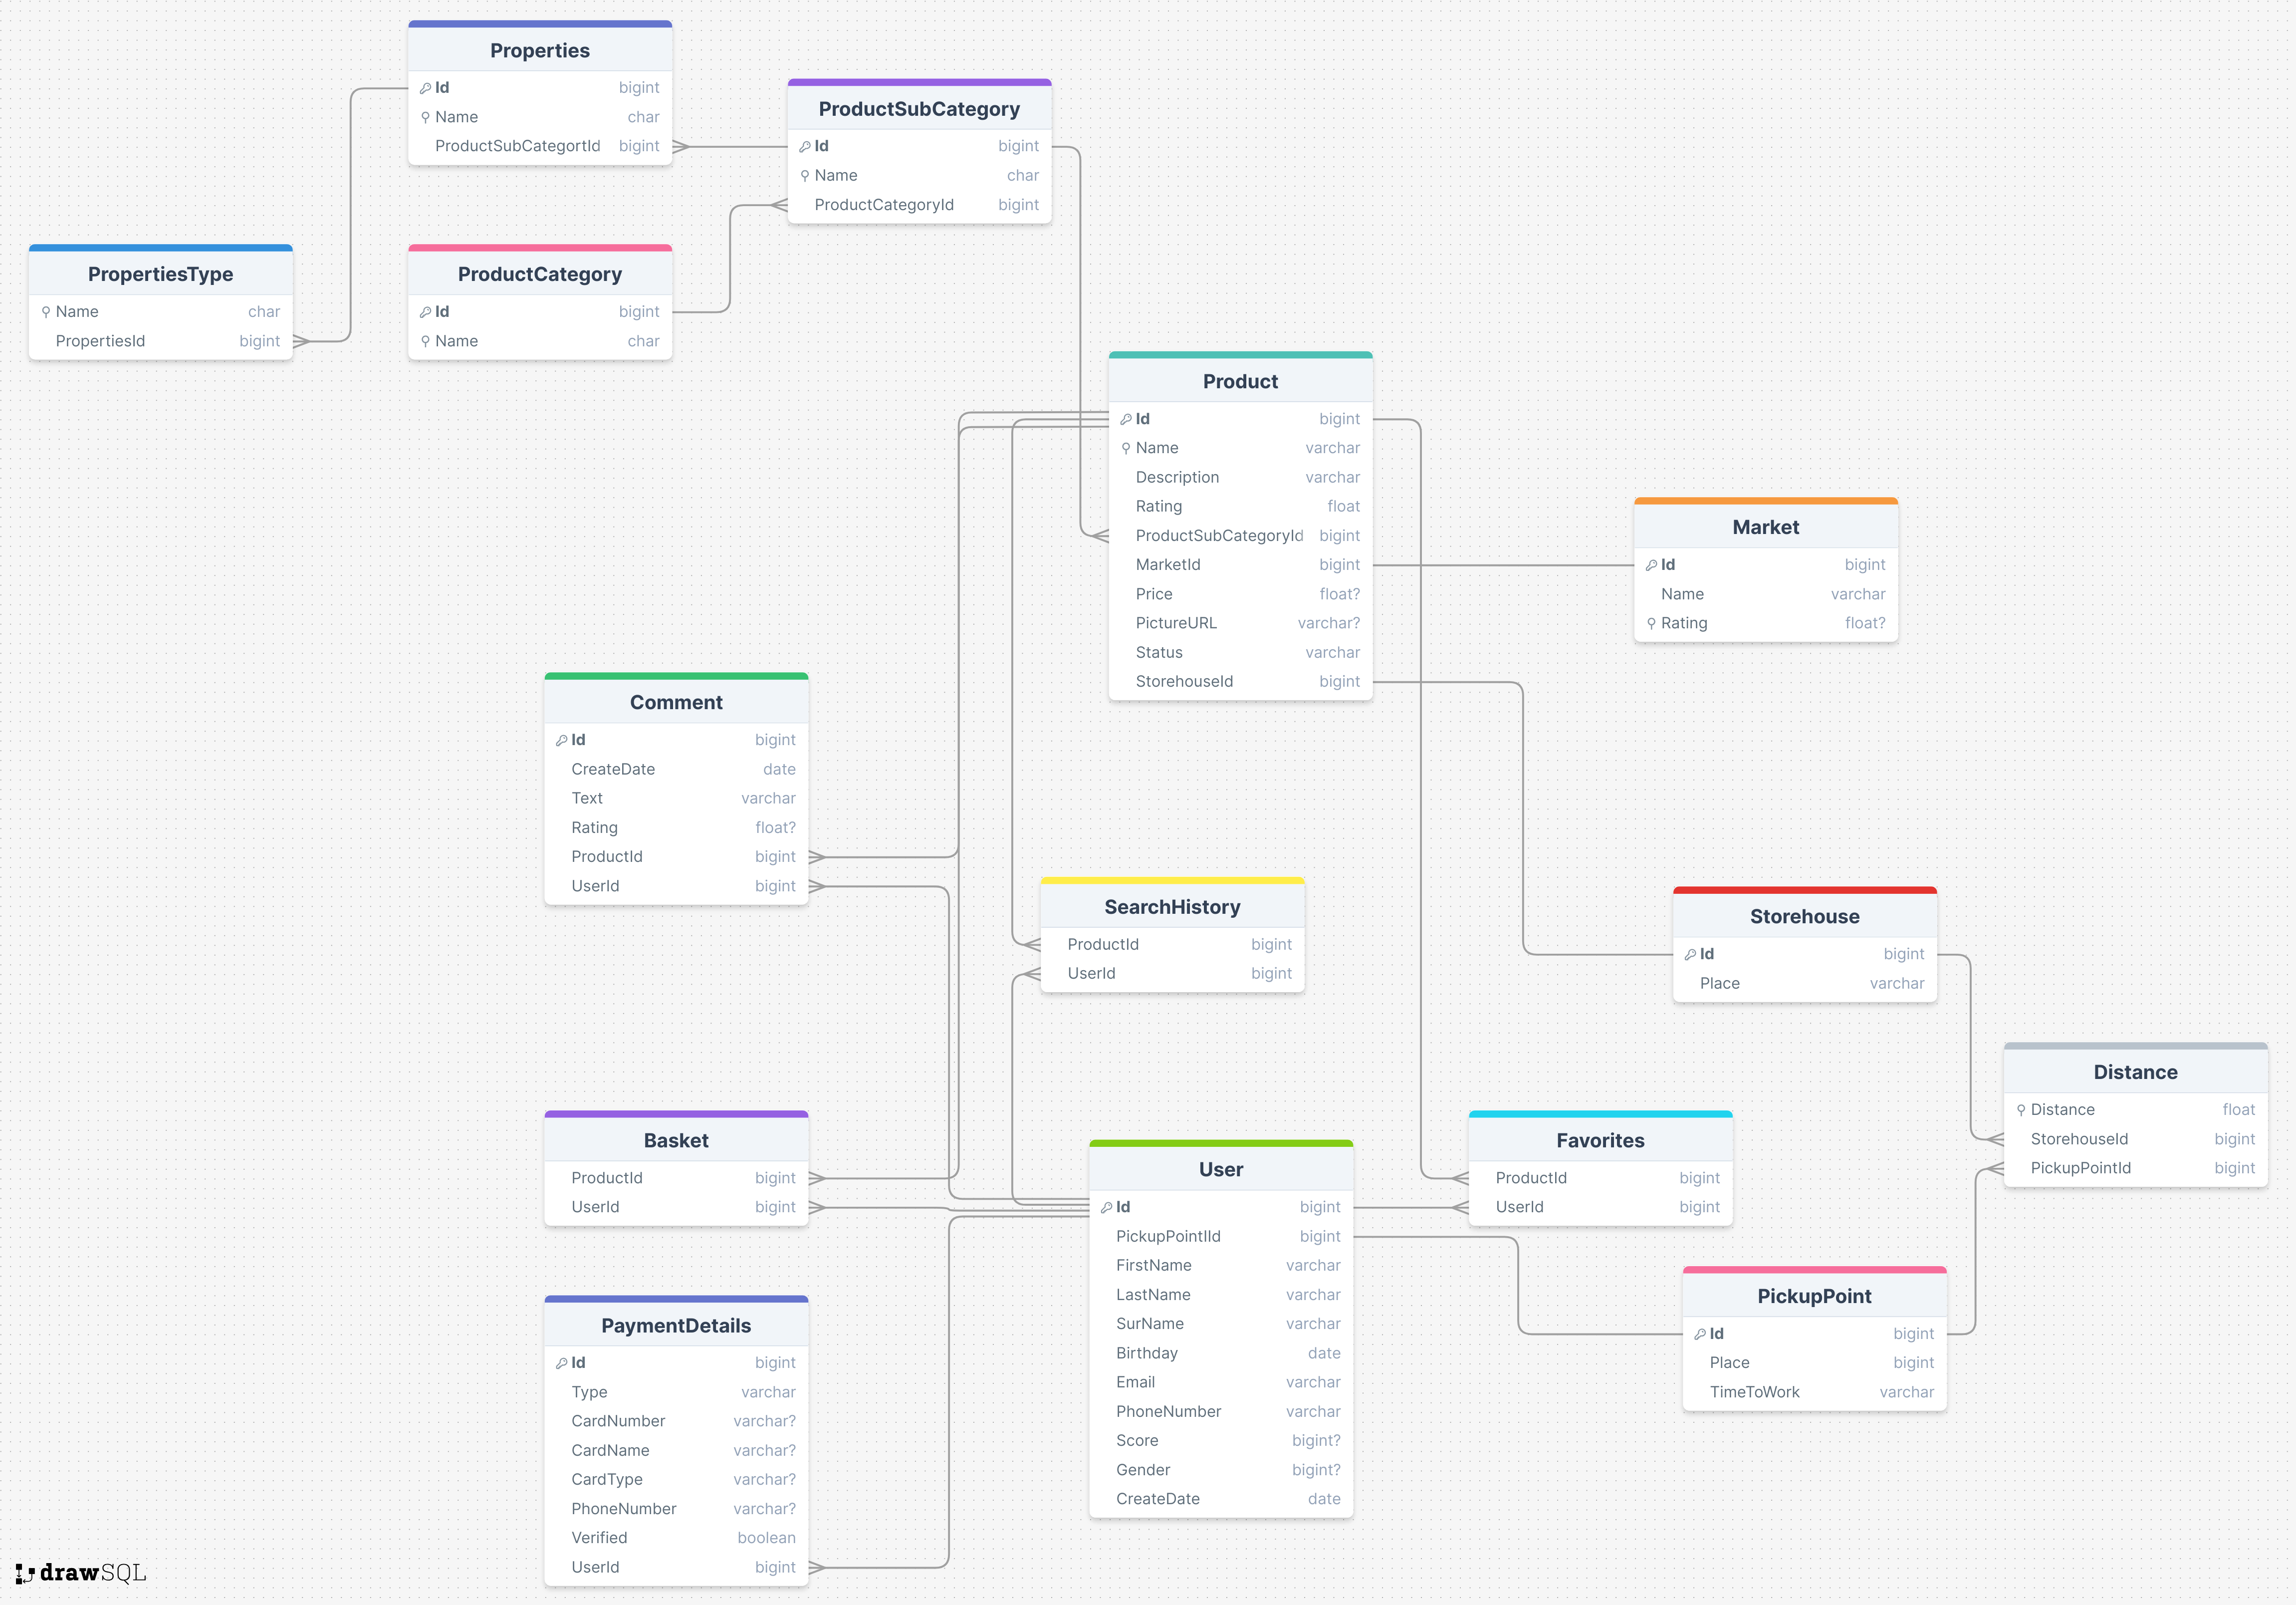

Таблица с типами свойств:

In [6]:
column_properties_type = {
    "Name" : "properties-type",
    "PropertiesId": "id"
}

table_properties_type = Table("PropertiesType", column_properties_type, count)

Таблица со свойствами:

In [7]:
column_properties = {
    "Id" : "id_p",
    "Name" : "propeties",
    "ProductSubCategortId": "id"
}

table_properties = Table("Properties", column_properties, count)

Таблица категорий товаров:

In [8]:
column_product_category = {
    "Id" : "id_p",
    "Name" : "categoryes",
}

table_product_category = Table("ProductCategory", column_product_category, count)


Таблица подкатегорий товаров:

In [9]:
column_product_sub_category = {
    "Id" : "id_p",
    "Name" : "sub-categoryes",
    "ProductCategoryId" : "id"
}

table_product_sub_category = Table("ProductSubCategory", column_product_sub_category, count)


Таблица продукта:

In [10]:
column_product = {
    "Id" : "id_p",
    "Name" : "callname",
    "Description" : "id",
    "Rating" : "rating",
    "ProductSubCategoryId": "id",
    "MarketId" : "id",
    "Price" : "price",
    "PictureURL" : "url",
    "Status" : "bool",
    "StorehouseId" : "id"
}

table_product = Table("Product", column_product, count)


Таблица комментариев:

In [11]:
column_comment = {
    "Id" : "id_p",
    "CreateDate" : "createDate",
    "Text" : "text",
    "Rating" : "rating",
    "ProductId" : "id",
    "UserId" : "id"
}

table_comment = Table("Comment", column_comment, count)


Таблица истории поиска:

In [12]:
column_search_history = {
    "ProductId" : "id",
    "UserId" : "id"
}

table_search_history = Table("SearchHistory", column_search_history, count)


Таблица пользователей:

In [13]:
column_user = {
    "Id" : "id_p",
    "PickupPointId" : "id",
    "FirstName": "first-name",
    "LastName": "last-name",
    "SurName": "surname",
    "Birthday" : "birthdate",
    "Email": "mail",
    "PhoneNumber" : "phone",
    "Score" : "int",
    "Gender" : "gender",
    "CreateDate": "createDate"
}

table_user = Table("User", column_user, count)


Таблица корзины покупок:

In [14]:
column_basket = {
    "ProductId" : "id",
    "UserId" : "id"
}

table_basket = Table("Basket", column_basket, count)


Таблица с данными для оплаты:

In [15]:
column_payment_details = {
    "Id" : "id_p",
    "Type" : "type",
    "CardNumber": "card",
    "CardName" : "name",
    "CardType" : "callname",
    "PhoneNumber" : "phone",
    "Verified" : "bool",
    "UserId": "id"

}

table_payment_details = Table("PaymentDetails", column_payment_details, count)


Таблица с избранными продуктами:

In [16]:
column_favorites = {
    "ProductId" : "id",
    "UserId" : "id"
}

table_favorites = Table("Favorites", column_favorites, count)


Таблица с продавцом:

In [17]:
column_market = {
    "Id" : "id_p",
    "Name" : "callname",
    "Rating" : "rating"
}

table_market = Table("Market", column_market, count)


Таблица с местом хранения:

In [18]:
column_storehouse = {
    "Id" : "id_p",
    "Place" : "address",
}

table_storehouse = Table("Storehouse", column_storehouse, count)


Таблица пункта выдачи:

In [19]:
column_pickup_point = {
    "Id" : "id_p",
    "Place" : "address",
    "TimeToWork" : "time"
}

table_pickup_point = Table("PickupPoint", column_pickup_point, count)


Таблица с дистанциями между пунктом выдачи и пунктом хранения:

In [20]:
column_distance = {
    "Distance" : "float",
    "StorehouseId" : "id",
    "PickupPointId" : "id"
}

table_distance = Table("Distance", column_distance, count)


Создание файла со скриптом для заполнения

In [21]:
tables = [table_market, table_storehouse, table_pickup_point, table_distance,
          table_product_category, table_product_sub_category, table_properties,
          table_properties_type, table_product, table_user, table_basket,
          table_payment_details, table_comment, table_search_history,
          table_favorites]
file = FileGenerator("insert.sql", tables)
file.create_file()

INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('0', 'Грудь', '7.6');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('1', 'Танцевать', '2.2');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('2', 'Сынок', '8.3');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('3', 'Рай', '8.1');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('4', 'Тесно', '7.7');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('5', 'Недостаток', '0.5');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('6', 'Вообще', '1.7');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('7', 'Пол', '8.3');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('8', 'Потрясти', '2.6');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('9', 'Один', '7.1');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('10', 'Второй', '4.2');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('11', 'Кольцо', '4.2');
INSERT INTO "Market" ("Id", "Name", "Rating") VALUES ('12', 'Умолять', '1.3'